In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from nltk.stem import LancasterStemmer

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
# Load the training data
train_data = pd.read_csv('/content/drive/MyDrive/Movie Genre/train_data.txt', sep = ':::', names = ['sno', 'Name', 'Genre', 'Description'], engine = 'python')

In [18]:
train_data.head()

,sno,Name,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [19]:
train_data.describe()

,sno
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sno          54214 non-null  int64 
 1   Name         54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [21]:
print(train_data.isnull().sum())

sno            0
Name           0
Genre          0
Description    0
dtype: int64


In [22]:
test_data = pd.read_csv('/content/drive/MyDrive/Movie Genre/test_data.txt', sep = ':::', names = ['sno', 'Name', 'Description'], engine='python')

In [23]:
test_data.head()

,sno,Name,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [24]:
test_data_sol = pd.read_csv("/content/drive/MyDrive/Movie Genre/test_data_solution.txt", sep = ":::", names = ['sno', 'Name', 'Genre', 'Description'], engine = 'python')
test_data_sol.head()

,sno,Name,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [25]:
test_data_sol = test_data_sol.drop(['sno', 'Description'], axis = 1)
test_data_sol.head()

,Name,Genre
0,Edgar's Lunch (1998),thriller
1,La guerra de papá (1977),comedy
2,Off the Beaten Track (2010),documentary
3,Meu Amigo Hindu (2015),drama
4,Er nu zhai (1955),drama


In [26]:
test_data = pd.merge(test_data, test_data_sol, on = ['Name'], how = 'left')
test_data.head()

,sno,Name,Description,Genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",thriller
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",comedy
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,drama


## EDA & Visualization

In [27]:
train_data['Genre'].value_counts()

,count
Genre,
drama,13613
documentary,13096
comedy,7447
short,5073
horror,2204
thriller,1591
action,1315
western,1032
reality-tv,884


In [28]:
train_data['Genre'].value_counts().index

Index([' drama ', ' documentary ', ' comedy ', ' short ', ' horror ',
       ' thriller ', ' action ', ' western ', ' reality-tv ', ' family ',
       ' adventure ', ' music ', ' romance ', ' sci-fi ', ' adult ', ' crime ',
       ' animation ', ' sport ', ' talk-show ', ' fantasy ', ' mystery ',
       ' musical ', ' biography ', ' history ', ' game-show ', ' news ',
       ' war '],
      dtype='object', name='Genre')

<ipython-input-29-67e3376ff3b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y='Genre', order = train_data['Genre'].value_counts().index, palette = 'viridis')


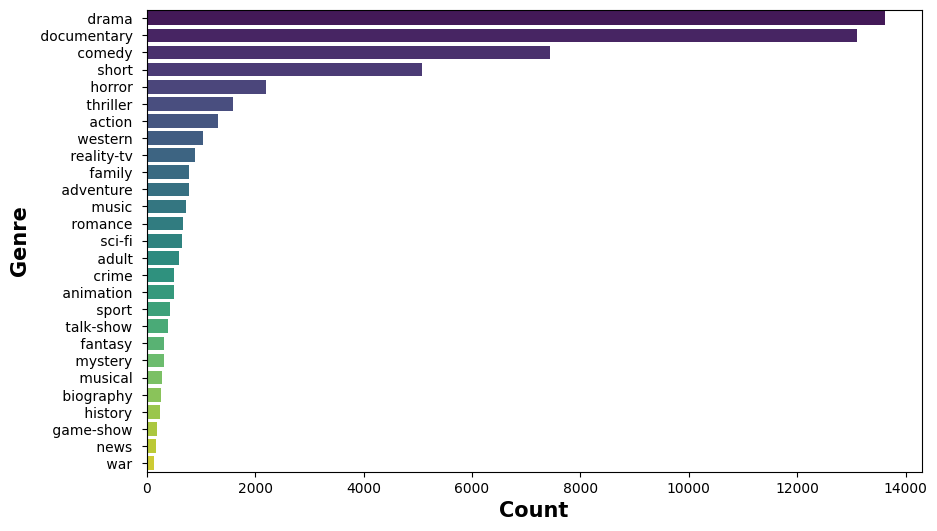

<ipython-input-29-67e3376ff3b9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_data['Genre'].value_counts().index, y = train_data['Genre'].value_counts(), palette = 'viridis')


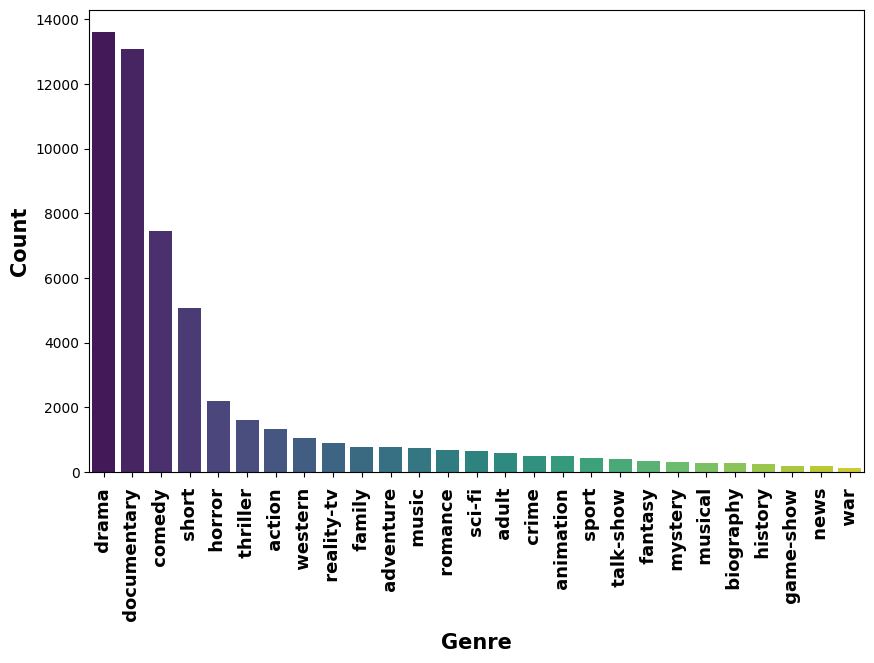

In [29]:
# Plot the distribution of genres in the training data
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, y='Genre', order = train_data['Genre'].value_counts().index, palette = 'viridis')
plt.xlabel('Count', fontsize=15, fontweight='bold')
plt.ylabel('Genre', fontsize=15, fontweight='bold')
plt.show()

# plot the distribution of genres using a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=train_data['Genre'].value_counts().index, y = train_data['Genre'].value_counts(), palette = 'viridis')
plt.xlabel('Genre', fontsize=15, fontweight='bold')
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.xticks(rotation = 90, fontsize = 13, fontweight = 'bold')
plt.show()

## Data Preprocessing and Text Cleaning

In [30]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

# Ensure you have downloaded stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Initialize the stemmer and stop words
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase all characters
    text = text.lower()

    # Remove Twitter handles
    text = re.sub(r'@\S+', '', text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove image references
    text = re.sub(r'pic.\S+', '', text)

    # Keep only alphabetic characters and apostrophes
    text = re.sub(r"[^a-zA-Z+']", ' ', text)

    # Remove single-character words and extra spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Remove punctuation
    text = "".join([i for i in text if i not in string.punctuation])

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords and short words
    words = [word for word in words if word not in stop_words and len(word) > 2]

    # Join words back into a single string
    text = " ".join(words)

    # Remove any extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the clean_text function to the 'Description' column
train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

In [32]:
test_data.head()

,sno,Name,Description,Genre,Text_cleaning
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",thriller,brane loves life car apartment job especially ...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",comedy,spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,documentary,one year life albin family shepherds north tra...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",drama,father died hasnt spoken brother years serious...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,drama,known internationally martial arts superstar b...


In [47]:
test_data['Text_cleaning'][0]

'brane loves life car apartment job especially girlfriend vespa one day showering vespa runs shampoo runs across street convenience store buy quick trip minutes returns vespa gone every trace existence wiped life becomes tortured existence one strange event another occurs confirm mind conspiracy working finding vespa'

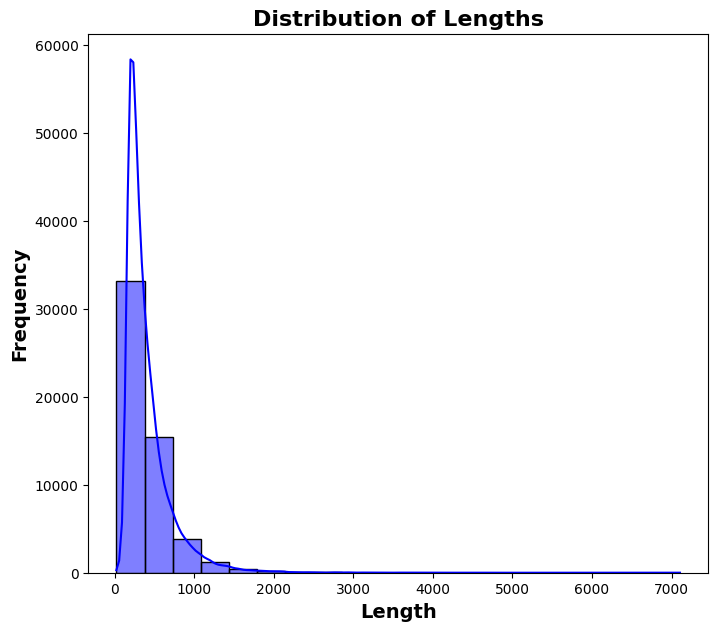

In [33]:
# Calculate the length of cleaned text
train_data['length_Text_cleaning'] = train_data['Text_cleaning'].apply(len)
# Visualize the distribution of text lengths
plt.figure(figsize=(8, 7))
sns.histplot(data=train_data, x='length_Text_cleaning', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

## Text Vectorization Using TF-IDF

In [34]:
# Intialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])

# Transform the test data
X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

## Split Data and Train a Model

In [35]:
# split the data into training and validation sets
X = X_train
y = train_data['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_test = X_test.drop('Genre', axis = 1)
y_test = test_data[""]

In [36]:
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()
lgc = LogisticRegression(max_iter = 500, random_state = 42, n_jobs=4)
svc = LinearSVC()

### Logistic Reegression

In [37]:
lgc.fit(X_train, y_train)
lgc.score(X_val, y_val)

0.579728857327308

### Support Vector Machine

In [38]:
svc.fit(X_train, y_train)
svc.score(X_val, y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


0.5883980448215439

### Bernoulli Naive Bayes

In [39]:
bnb.fit(X_train, y_train)
bnb.score(X_val, y_val)

0.4865812044637093

### Multinomial Naive Bayes

In [40]:
mnb.fit(X_train, y_train)
mnb.score(X_val, y_val)

0.44526422576777647

## Predicting and Evaluating Model Performances

In [41]:
# Initialize and train a Multinomial Nive Byes classification
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_val)

# Evaluate the performance model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.45


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.61      0.04      0.07      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
# Make predictions on the validation set
y_pred_test_lgc = lgc.predict(X_test)
y_pred_train_lgc = lgc.predict(X_val)

y_pred_test_bnb = bnb.predict(X_test)
y_pred_train_bnb = bnb.predict(X_val)

y_pred_test_mnb = mnb.predict(X_test)
y_pred_train_mnb = mnb.predict(X_val)

y_pred_test_svc = svc.predict(X_test)
y_pred_train_svc = svc.predict(X_val)

print("Logistic Regression: ")

print("Train accuracy: ", accuracy_score(y_val, y_pred_train_lgc))
print("Test accuracy: ", accuracy_score(test_data["Genre"], y_pred_test_lgc))

print("\nBernoulli Naive Bayes: ")

print("Train accuracy: ", accuracy_score(y_val, y_pred_train_bnb))
print("Test accuracy: ", accuracy_score(test_data["Genre"], y_pred_test_bnb))

print("\nMultinomial Naive Bayes: ")

print("Train accuracy: ", accuracy_score(y_val, y_pred_train_mnb))
print("Test accuracy: ", accuracy_score(test_data["Genre"], y_pred_test_mnb))

print("\nSupport Vector Machine: ")

print("Train accuracy: ", accuracy_score(y_val, y_pred_train_svc))
print("Test accuracy: ", accuracy_score(test_data["Genre"], y_pred_test_svc))

Logistic Regression: 
Train accuracy:  0.579728857327308
Test accuracy:  0.581309963099631

Bernoulli Naive Bayes: 
Train accuracy:  0.4865812044637093
Test accuracy:  0.48132841328413284

Multinomial Naive Bayes: 
Train accuracy:  0.44526422576777647
Test accuracy:  0.4419557195571956

Support Vector Machine: 
Train accuracy:  0.5883980448215439
Test accuracy:  0.5818450184501845


## Text predictions with Logistic Regression and TF-IDF Vectorization

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Load Data
train_data = pd.read_csv('/content/drive/MyDrive/Movie Genre/train_data.txt', sep = ':::', names = ['sno', 'Name', 'Genre', 'Description'], engine = 'python')
test_data = pd.read_csv('/content/drive/MyDrive/Movie Genre/test_data_solution.txt', sep = ':::', names = ['sno', 'Name', 'Genre', 'Description'], engine='python')

# Preprocess Text Data
import nltk
nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
  text = text.lower()
  text = re.sub(r'\d+', '', text)
  text = text.translate(str.maketrans('', '', string.punctuation))
  tokens = word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [word for word in tokens if word not in stop_words]
  return ' '.join(filtered_tokens)

train_data['processed_discription'] = train_data['Description'].apply(preprocess_text)
test_data['processed_discription'] = test_data['Description'].apply(preprocess_text)

# Prepare data for classification
X_train = train_data['processed_discription']
y_train = train_data['Genre']
X_test = test_data['processed_discription']
y_test = test_data['Genre']

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize TF-IDF Vectorizer and Logistic Regression Classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', LogisticRegression(max_iter = 1000, random_state = 42, n_jobs=4))
])

# Train the model
pipeline.fit(X_train, y_train_encoded)

# Define example Input values
example_texts = [
    "A young boy discovers that he has magical powers and must attend a wizarding school where he learns to master spells and fight dark forces.",
    "In a dystopian future, a group of rebels band together to overthrow a corrupt government and restore freedom to their city.",
    "A romantic comedy where two strangers meet on a trip to Paris and slowly fall in love despite their very different personalities.",
    "An astronaut gets stranded on Mars after a mission goes wrong and must use his scientific knowledge and willpower to survive alone.",
    "A detective investigates a series of mysterious murders in a small town, uncovering a dark conspiracy along the way.",
]

# Test with Example Inputs
preprocessed_text = [preprocess_text(text) for text in example_texts]
predictions_encoded = pipeline.predict(preprocessed_text)
predictions = label_encoder.inverse_transform(predictions_encoded)

# Print the predictions
for text, prediction in zip(example_texts, predictions):
    print(f"Text: {text}")
    print(f"Predicted Genre: {prediction}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Text: A young boy discovers that he has magical powers and must attend a wizarding school where he learns to master spells and fight dark forces.
Predicted Genre:  drama 
Text: In a dystopian future, a group of rebels band together to overthrow a corrupt government and restore freedom to their city.
Predicted Genre:  action 
Text: A romantic comedy where two strangers meet on a trip to Paris and slowly fall in love despite their very different personalities.
Predicted Genre:  comedy 
Text: An astronaut gets stranded on Mars after a mission goes wrong and must use his scientific knowledge and willpower to survive alone.
Predicted Genre:  sci-fi 
Text: A detective investigates a series of mysterious murders in a small town, uncovering a dark conspiracy along the way.
Predicted Genre:  thriller 
